In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.image as im

In [2]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    FLAT_IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
    
    def dominantColors(self):

        img = self.IMAGE
                
        #решейп для в 2D 
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #Вылетала ошибка и картинка не обрабатывалась, поэтому доп инициализация
        self.FLAT_IMAGE = img
        
        #кластеризация
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #цвета
        self.COLORS = kmeans.cluster_centers_
        
        #лейблы для каждого цвета
        self.LABELS = kmeans.labels_
        
        return self.COLORS.astype(int)
                
    def plotHistogram(self):
       
        
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #создаю последовательность для подсчета цветов   
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        
        colors = self.COLORS
        
        #обратная сортировка цветов, то есть сначала самый "популярный"
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
       
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #создание самих цветовых боксов
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #rgb
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        
        plt.figure()
        plt.axis("off")
        plt.imshow(chart)
        plt.show()
        return hist*hist.sum()
        
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
    
        fig = plt.figure()
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.FLAT_IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
            ax.set_xlabel('$X$', fontsize=20, rotation=150)
            ax.set_ylabel('$Y$', fontsize=20, rotation=60)
            ax.set_zlabel('$Z$', fontsize=20)
        plt.show()
    
        
    def colorPixels(self):
        
        shape = self.IMAGE.shape
        
        img = np.zeros((shape[0] * shape[1], 3))
        labels = self.LABELS

        for i,color in enumerate(self.COLORS):
            
            indices = np.where(labels==i)[0]
            
            for index in indices:
                img[index] = color
        
        img = img.reshape((shape[0], shape[1], 3)).astype(int)
        
        
        plt.figure()
        plt.axis("off")
        plt.imshow(img)
        plt.show()

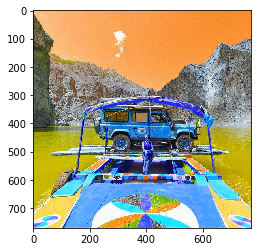

In [3]:
img = 'image402.jpg'
img = cv2.imread(img)
plt.imshow(img)

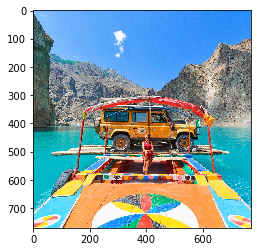

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

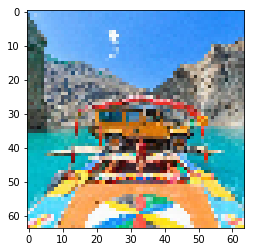

In [5]:
img = cv2.resize(img, (64,64))
plt.imshow(img)

In [8]:
clusters = 16

In [9]:
dc = DominantColors(img, clusters)
colors = dc.dominantColors()
print(colors)

[[ 60 151 248]
 [209  92  35]
 [138 144 145]
 [ 63  79  80]
 [247 159  89]
 [240 238 231]
 [  8 177 191]
 [133  55  32]
 [179 177 171]
 [ 46  32  29]
 [106 108 106]
 [ 95 215 243]
 [104 174 249]
 [250 224  69]
 [ 42 154 155]
 [238 189 150]]


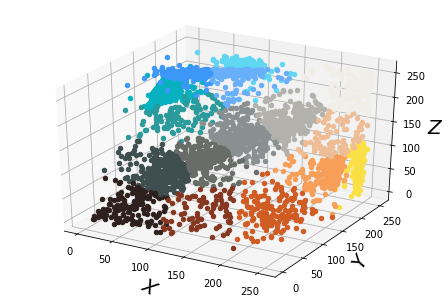

In [10]:
dc.plotClusters()

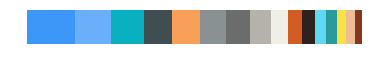

In [11]:
a = dc.plotHistogram()

In [19]:
dataframe = pd.DataFrame()
dataframe['image'] = 0
for col in range(len(a)):
    dataframe['feature_'+str(col)] = 0

In [20]:
dataframe.loc[0] = ['image3'] + list(a)
dataframe

,image,feature_0
0,image3,1.0


In [21]:
imgs = ['image'+str(i)+'.jpg' for i in range(1,105)]
images = [cv2.imread(i) for i in imgs]

In [22]:
for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    images[i] = cv2.resize(images[i], (64,64))

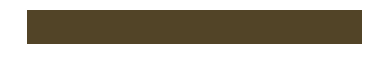

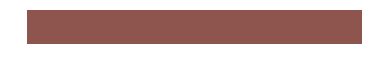

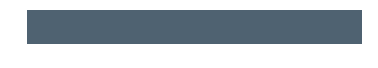

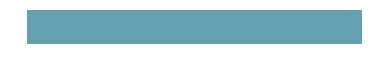

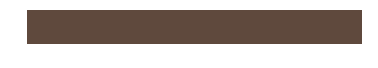

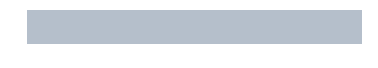

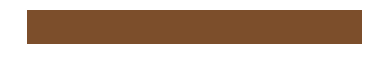

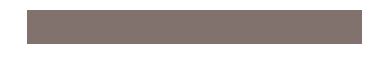

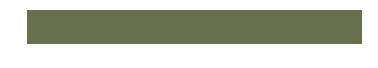

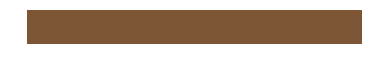

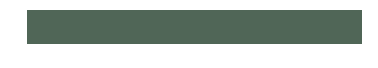

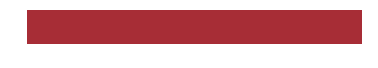

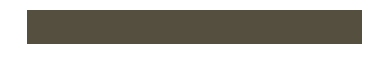

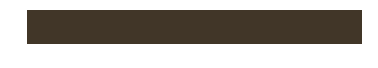

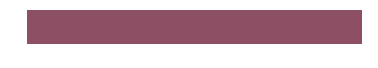

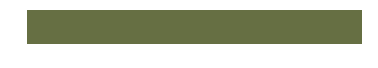

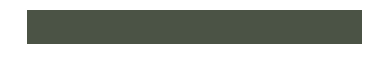

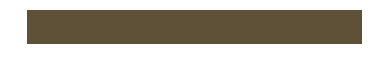

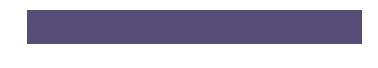

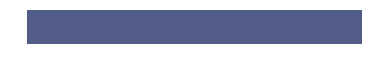

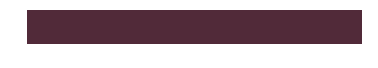

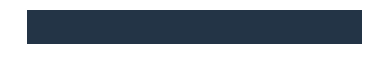

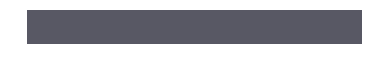

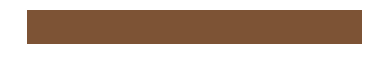

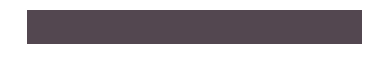

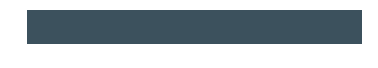

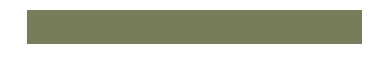

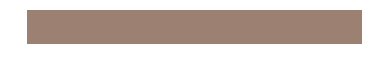

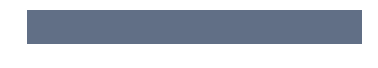

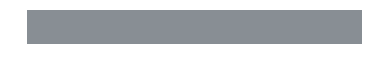

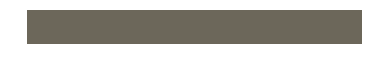

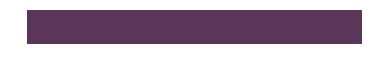

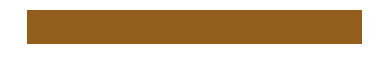

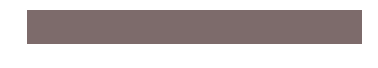

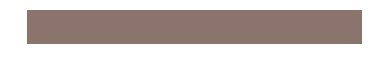

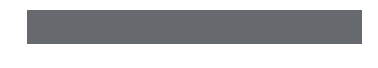

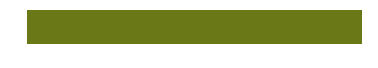

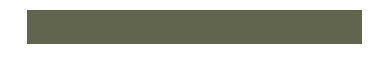

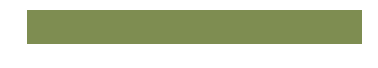

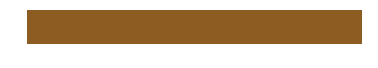

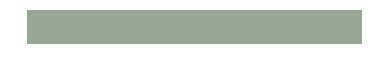

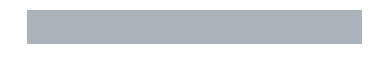

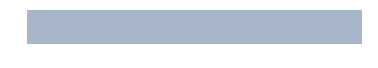

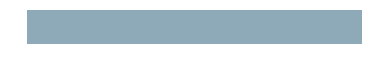

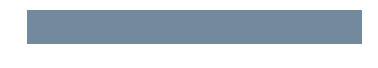

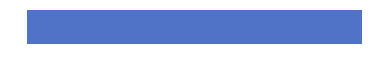

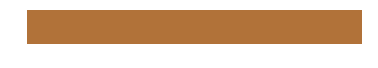

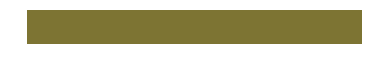

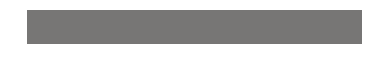

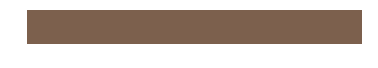

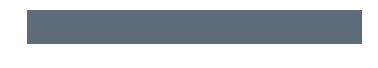

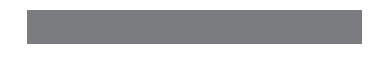

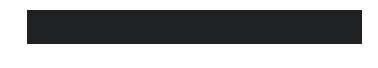

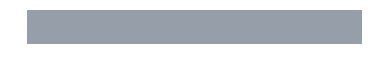

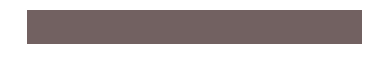

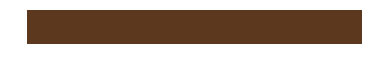

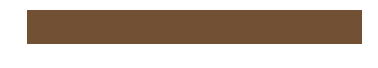

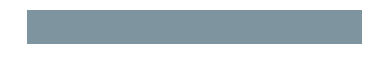

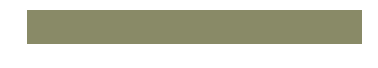

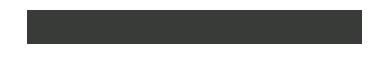

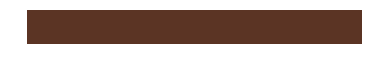

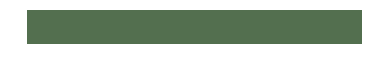

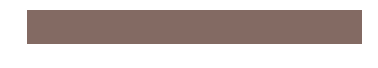

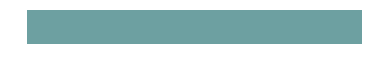

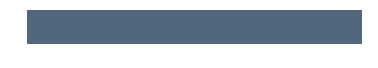

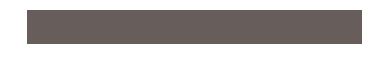

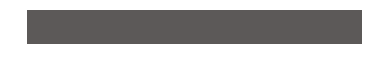

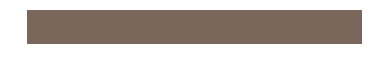

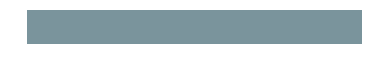

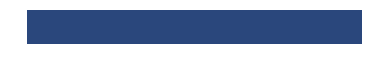

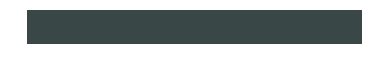

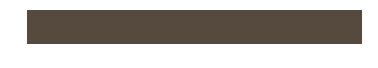

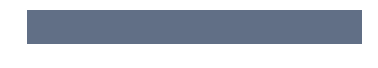

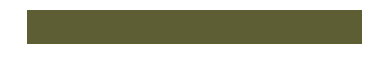

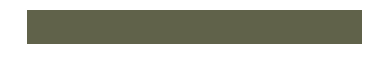

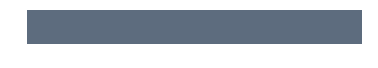

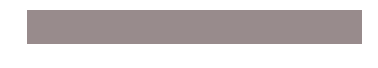

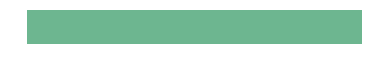

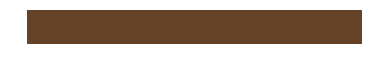

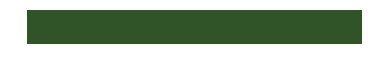

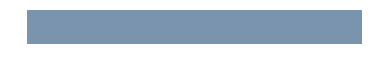

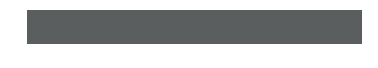

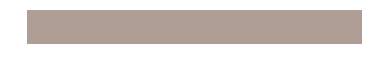

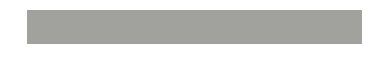

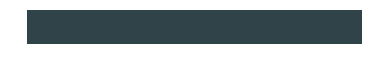

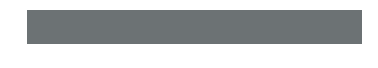

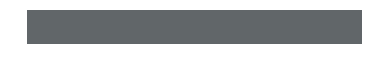

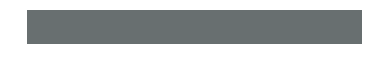

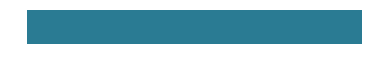

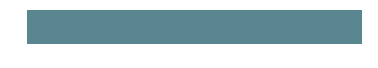

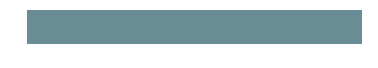

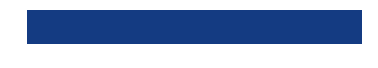

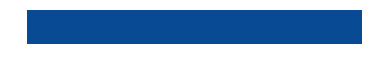

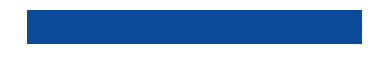

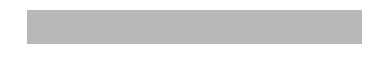

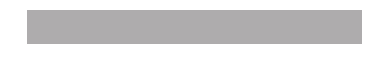

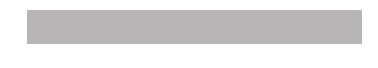

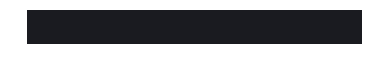

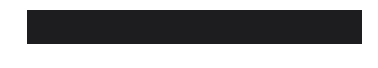

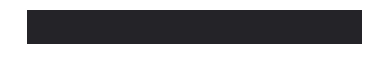

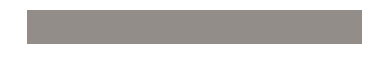

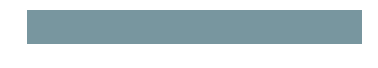

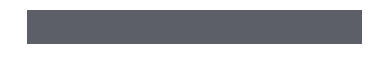

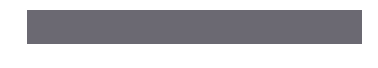

In [23]:
color_images = []
histograms = []
for i in range(len(images)):
    dc = DominantColors(images[i], clusters)
    color_images.append(dc.dominantColors())
#     dc.plotClusters()
    histograms.append(dc.plotHistogram())

In [24]:
for i in range(len(images)):
    dataframe.loc[i+1] = ['image'+str(i)] + list(histograms[i])
dataframe

,image,feature_0
0,image3,1.0
1,image0,1.0
2,image1,1.0
3,image2,1.0
4,image3,1.0
5,image4,1.0
6,image5,1.0
7,image6,1.0
8,image7,1.0
9,image8,1.0


In [25]:
from scipy.spatial.distance import pdist
d = pdist(dataframe.drop('image', axis=1), metric='cityblock')
d

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
clst = KMeans(n_clusters = 12, # число кластеров
           tol=0.01,
           n_init = 100,
           max_iter = 1000, 
           random_state=15434,
          )
clst.fit(dataframe.drop('image', axis=1))

/home/ilya/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=12, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=15434, tol=0.01, verbose=0)

In [ ]:
clst.cluster_centers_

In [ ]:
clst.labels_

In [ ]:
data_kmeans = dataframe.drop('image', axis=1).copy() # deep copy

centers = np.zeros((12, 2))
centers[:, 0:5] = clst.cluster_centers_
centers = pd.DataFrame(centers, columns=data_kmeans.columns)

data_kmeans['cluster'] = clst.labels_.astype(str)

# centers['cluster'] = np.array(['c0', 'c1', 'c2']).astype(str)

centers

In [ ]:
data_kmeans.head()

In [ ]:
inertia = []
for k in range(1, 20):
    Z = KMeans(n_clusters=k, 
               init = 'random',
               n_init = 100,
               max_iter = 1000).fit(dataframe.drop('image', axis=1))
    inertia.append(Z.inertia_)

    
inertia = np.sqrt(inertia)

plt.plot(range(1, 20), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')
plt.axvline(x=12, c='r')
plt.show()

In [ ]:
data_kmeans

In [ ]:
ims = ['image'+str(i)+'.jpg' for i in range(1,105)]
imses = [cv2.imread(i) for i in ims]
for i in range(len(imses)):
    imses[i] = cv2.cvtColor(imses[i], cv2.COLOR_BGR2RGB)

In [ ]:
clust = data_kmeans[data_kmeans['cluster'] == '11']
plt.figure(figsize=(15,15))
for i in range(len(clust.index)):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imses[clust.index[i]], cmap=plt.cm.binary)
    plt.grid(False)

plt.show()